# Lead Scoring Case Study

<b>Problem Statement:</b>
 
1)An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
 
2)Although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.


In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads_data.shape

(9240, 37)

In [4]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [7]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
def DispCatgorlVal(colName):
    print('%s values :-' % colName)
    print(leads_data[colName].unique())
    print('\n')
    
catg_var = ['Lead Origin', 'Lead Source','Do Not Email', 'Do Not Call','Last Activity','Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']
[ DispCatgorlVal(item) for item in catg_var]

Lead Origin values :-
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']


Lead Source values :-
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']


Do Not Email values :-
['No' 'Yes']


Do Not Call values :-
['No' 'Yes']


Last Activity values :-
['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']


Country values :-
[nan 'India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates'
 'United States' 'Australia'

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [10]:

sel_catg_var = []

for col in leads_data.columns:
    if 'Select' in leads_data[col].unique().tolist():
        sel_catg_var.append(col)
        
sel_catg_var

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [11]:
# dealing with select option
# Replacing with nan
leads_data = leads_data.replace("Select",np.nan)

In [12]:
sel_catg_var = []

for col in leads_data.columns:
    if 'Select' in leads_data[col].unique().tolist():
        sel_catg_var.append(col)
        
sel_catg_var

[]

In [13]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
def DispCatgorlVal(colName):
    print('%s values :-' % colName)
    print(leads_data[colName].unique())
    print('\n')
    
#catg_var = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CmpnyName']

[ DispCatgorlVal(item) for item in leads_data.columns]

Prospect ID values :-
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']


Lead Number values :-
[660737 660728 660727 ... 579545 579538 579533]


Lead Origin values :-
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']


Lead Source values :-
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']


Do Not Email values :-
['No' 'Yes']


Do Not Call values :-
['No' 'Yes']


Converted values :-
[0 1]


TotalVisits values :-
[  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [15]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [16]:
#Dealing with columns more than 70 percent 
mpct_null = round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)
missing_features = mpct_null[mpct_null > 70.00].index
missing_features

Index(['How did you hear about X Education', 'Lead Profile'], dtype='object')

In [17]:
#Removing columns having nan's more than 70
leads_data.drop(missing_features, axis=1, inplace=True)


In [18]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

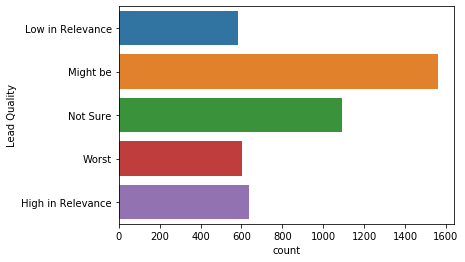

In [19]:
# Checking the Lead Quality column  - 51.59 percentage of nan's
sns.countplot(y=leads_data['Lead Quality'])

In [20]:
leads_data['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [21]:
# as per the Business requirement - 'Not Sure' is similar to nan value and we can replace - as employee is updating lead quality
# we can replace it with 'Not Sure' vqalue..

leads_data['Lead Quality'].fillna("Not Sure", inplace = True) 

leads_data['Lead Quality'].unique()


array(['Low in Relevance', 'Not Sure', 'Might be', 'Worst',
       'High in Relevance'], dtype=object)

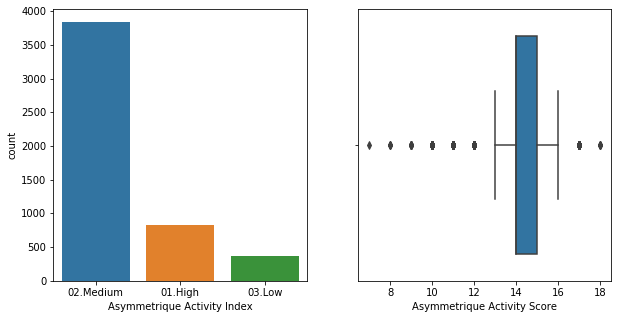

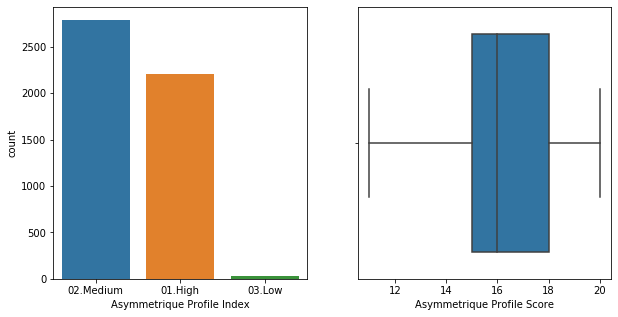

In [22]:
#Dealing with next high percentage nan's 45%
#Asymmetrique Activity Index                      45.65
#Asymmetrique Profile Index                       45.65
#Asymmetrique Activity Score                      45.65
#Asymmetrique Profile Score                       45.65
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1)

sns.countplot(leads_data['Asymmetrique Activity Index'],ax = ax[0])
sns.boxplot(leads_data['Asymmetrique Activity Score'],ax = ax[1])

fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
sns.countplot(leads_data['Asymmetrique Profile Index'],ax = ax[0])
sns.boxplot(leads_data['Asymmetrique Profile Score'],ax = ax[1])





In [23]:
assym_vars = ['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']
for col in assym_vars:
    print(leads_data[col].describe())

count          5022
unique            3
top       02.Medium
freq           3839
Name: Asymmetrique Activity Index, dtype: object
count          5022
unique            3
top       02.Medium
freq           2788
Name: Asymmetrique Profile Index, dtype: object
count    5022.000000
mean       14.306252
std         1.386694
min         7.000000
25%        14.000000
50%        14.000000
75%        15.000000
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64
count    5022.000000
mean       16.344883
std         1.811395
min        11.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64


In [24]:
# Displaying frequencies for assym columns
for col in assym_vars:
    print(leads_data[col].value_counts())



02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64


In [25]:
# As per the above results, unable to impute values in the assymteric columns, removing he cols seems to be better option
leads_data.drop(assym_vars, axis=1, inplace=True)

In [26]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

[Text(0, 0, 'Mumbai'),
 Text(0, 0, 'Thane & Outskirts'),
 Text(0, 0, 'Other Metro Cities'),
 Text(0, 0, 'Other Cities'),
 Text(0, 0, 'Other Cities of Maharashtra'),
 Text(0, 0, 'Tier II Cities')]

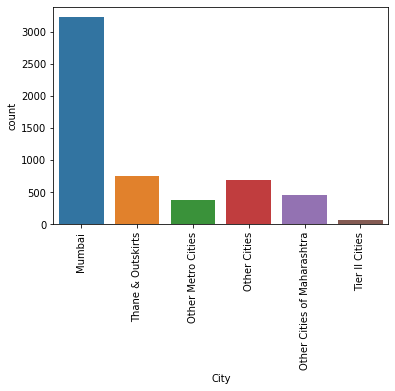

In [27]:
# Check with City column having next high % nan's
g = sns.countplot(leads_data['City'])

g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [28]:
#getting frequency of city
leads_data['City'].value_counts()


Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

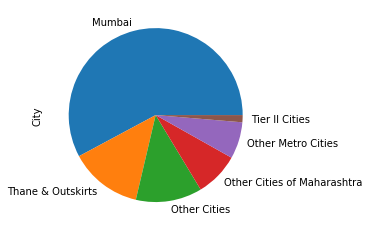

In [29]:
leads_data['City'].value_counts().plot.pie()

In [30]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [31]:
# Mumbai is almost having 70 % values in city colum. lets impute Mumbai in nan's
leads_data['City'].fillna("Mumbai", inplace = True) 

leads_data['City'].unique()

array(['Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

[Text(0, 0, 'Business Administration'),
 Text(0, 0, 'Media and Advertising'),
 Text(0, 0, 'Supply Chain Management'),
 Text(0, 0, 'IT Projects Management'),
 Text(0, 0, 'Finance Management'),
 Text(0, 0, 'Travel and Tourism'),
 Text(0, 0, 'Human Resource Management'),
 Text(0, 0, 'Marketing Management'),
 Text(0, 0, 'Banking, Investment And Insurance'),
 Text(0, 0, 'International Business'),
 Text(0, 0, 'E-COMMERCE'),
 Text(0, 0, 'Operations Management'),
 Text(0, 0, 'Retail Management'),
 Text(0, 0, 'Services Excellence'),
 Text(0, 0, 'Hospitality Management'),
 Text(0, 0, 'Rural and Agribusiness'),
 Text(0, 0, 'Healthcare Management'),
 Text(0, 0, 'E-Business')]

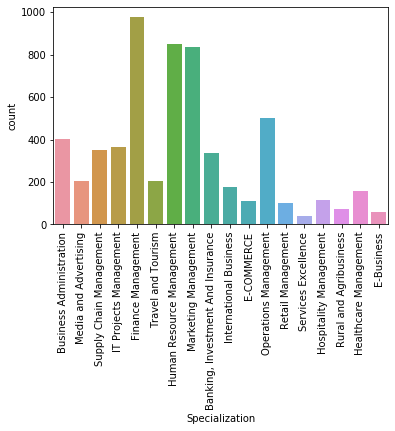

In [32]:
# Next highest nan's column = Specialization
g = sns.countplot(leads_data['Specialization'])

g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [33]:
# Unable to impute any value and count of values varies differently.. Lets see if we can imput e any other value for labelling nan's

# Deletion is not correct option _ lets think twice before deleting this column


leads_data['Specialization'].value_counts()


Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

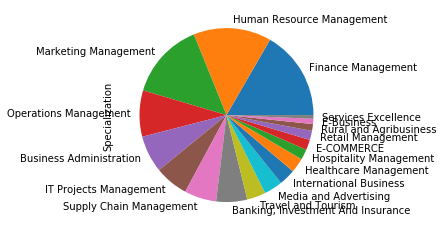

In [34]:
leads_data['Specialization'].value_counts().plot.pie()


In [35]:
# Imputing the specialization column with others
leads_data['Specialization'].fillna("Others", inplace = True) 


In [36]:
leads_data['Specialization'].value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [37]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

[Text(0, 0, 'Interested in other courses'),
 Text(0, 0, 'Ringing'),
 Text(0, 0, 'Will revert after reading the email'),
 Text(0, 0, 'Lost to EINS'),
 Text(0, 0, 'In confusion whether part time or DLP'),
 Text(0, 0, 'Busy'),
 Text(0, 0, 'switched off'),
 Text(0, 0, 'in touch with EINS'),
 Text(0, 0, 'Already a student'),
 Text(0, 0, 'Diploma holder (Not Eligible)'),
 Text(0, 0, 'Graduation in progress'),
 Text(0, 0, 'Closed by Horizzon'),
 Text(0, 0, 'number not provided'),
 Text(0, 0, 'opp hangup'),
 Text(0, 0, 'Not doing further education'),
 Text(0, 0, 'invalid number'),
 Text(0, 0, 'wrong number given'),
 Text(0, 0, 'Interested  in full time MBA'),
 Text(0, 0, 'Still Thinking'),
 Text(0, 0, 'Lost to Others'),
 Text(0, 0, 'Shall take in the next coming month'),
 Text(0, 0, 'Lateral student'),
 Text(0, 0, 'Interested in Next batch'),
 Text(0, 0, 'Recognition issue (DEC approval)'),
 Text(0, 0, 'Want to take admission but has financial problems'),
 Text(0, 0, 'University not recognized

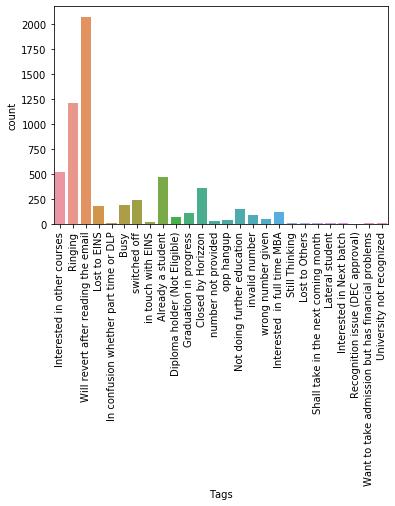

In [38]:

# Next highest nan's column = Tags
g = sns.countplot(leads_data['Tags'])

g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [39]:
# Unable to impute any value and count of values varies differently.. Lets see if we can imput e any other value for labelling nan's

# Deletion is not correct option _ lets think twice before deleting this column


leads_data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

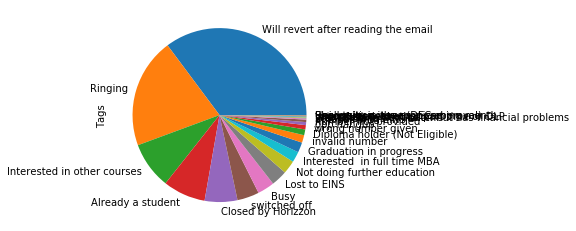

In [40]:
leads_data['Tags'].value_counts().plot.pie()

In [41]:
# It is difficult to choose the value b/w 'will revert after reading mail' and 'ringing'. Thought of going to impute the missing values
# with new value 'Other issues'

leads_data['Tags'].fillna("Other issues", inplace = True) 

leads_data['Tags'].value_counts()

Other issues                                         3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [42]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

[Text(0, 0, 'Better Career Prospects'),
 Text(0, 0, 'Flexibility & Convenience'),
 Text(0, 0, 'Other')]

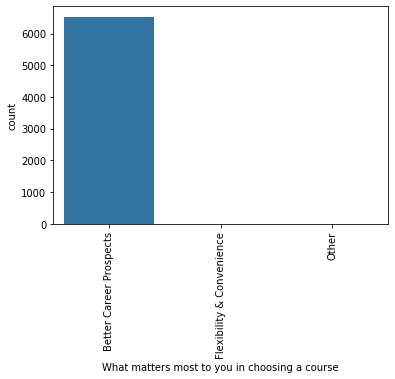

In [43]:
# Next highest nan's column = What matters most to you in choosing a course
g = sns.countplot(leads_data['What matters most to you in choosing a course'])

g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [44]:
leads_data['What matters most to you in choosing a course'].value_counts()
#leads_data['What matters most to you in choosing a course'].value_counts().plot.pie()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [45]:
# Imputing ''What matters most to you in choosing a course' with 'Better Career Prospects'
leads_data['What matters most to you in choosing a course'].fillna("Better Career Prospects", inplace = True) 

leads_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [46]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

[Text(0, 0, 'Unemployed'),
 Text(0, 0, 'Student'),
 Text(0, 0, 'Working Professional'),
 Text(0, 0, 'Businessman'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Housewife')]

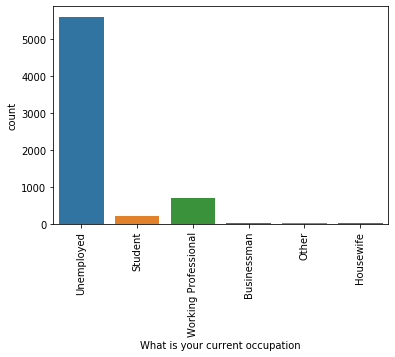

In [47]:
# Next highest nan's column = What is your current occupation
g = sns.countplot(leads_data['What is your current occupation'])

g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [48]:
leads_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [49]:
# Imputing ''What is your current occupation' with 'Unemployed'
leads_data['What is your current occupation'].fillna("Unemployed", inplace = True) 

leads_data['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [50]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

[Text(0, 0, 'India'),
 Text(0, 0, 'Russia'),
 Text(0, 0, 'Kuwait'),
 Text(0, 0, 'Oman'),
 Text(0, 0, 'United Arab Emirates'),
 Text(0, 0, 'United States'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Ghana'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Qatar'),
 Text(0, 0, 'Saudi Arabia'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Sri Lanka'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Nigeria'),
 Text(0, 0, 'Hong Kong'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Asia/Pacific Region'),
 Text(0, 0, 'Uganda'),
 Text(0, 0, 'Kenya'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'South Africa'),
 Text(0, 0, 'Tanzania'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'Malaysia'),
 Text(0, 0, 'Liberia'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Philippines'),
 Text(0, 0, 'Bangladesh'),
 Text(0, 0, 'Vietnam'),
 Text(0, 0, 'Indonesia')]

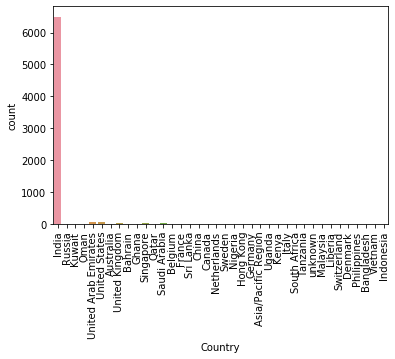

In [51]:
# Next highest nan's column = Country
g = sns.countplot(leads_data['Country'])

g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [52]:
leads_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Kuwait                     4
Germany                    4
Canada                     4
South Africa               4
Sweden                     3
China                      2
Uganda                     2
Bangladesh                 2
Ghana                      2
Belgium                    2
Asia/Pacific Region        2
Netherlands                2
Philippines                2
Italy                      2
Malaysia                   1
Vietnam                    1
Denmark                    1
Sri Lanka                  1
Liberia                    1
Tanzania                   1
Russia        

In [53]:
# Imputing ''Country' with 'India'
leads_data['Country'].fillna("India", inplace = True) 

leads_data['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Kuwait                     4
Germany                    4
Canada                     4
South Africa               4
Sweden                     3
China                      2
Uganda                     2
Bangladesh                 2
Ghana                      2
Belgium                    2
Asia/Pacific Region        2
Netherlands                2
Philippines                2
Italy                      2
Malaysia                   1
Vietnam                    1
Denmark                    1
Sri Lanka                  1
Liberia                    1
Tanzania                   1
Russia        

In [54]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [55]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


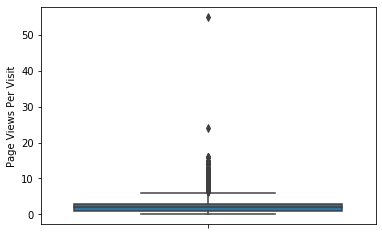

In [56]:
sns.boxplot(y = leads_data['Page Views Per Visit'])

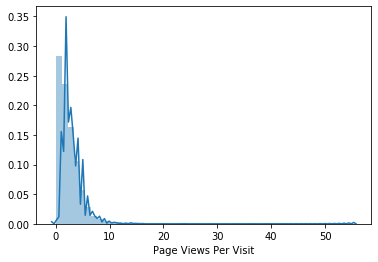

In [57]:
# Next highest nan's column = Country
g = sns.distplot(leads_data['Page Views Per Visit'].dropna())

#g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [58]:
# As we can see outliers in Page Views Per Visit hence imputing with median 
pag_vis_med = leads_data['Page Views Per Visit'].median(skipna = True)
pag_vis_med


2.0

In [59]:
leads_data['Page Views Per Visit'].fillna(pag_vis_med, inplace = True) 

leads_data['Page Views Per Visit'].value_counts()

0.00     2189
2.00     1932
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
         ... 
1.19        1
3.91        1
55.00       1
3.17        1
2.57        1
12.33       1
2.08        1
3.38        1
2.90        1
1.48        1
2.38        1
14.50       1
11.50       1
8.50        1
1.45        1
1.31        1
3.43        1
3.83        1
1.54        1
2.86        1
1.64        1
3.29        1
8.33        1
6.67        1
1.21        1
1.27        1
8.21        1
2.14        1
2.63        1
2.45        1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [60]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [61]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.357440
std,23405.995698,0.486714,4.854853,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


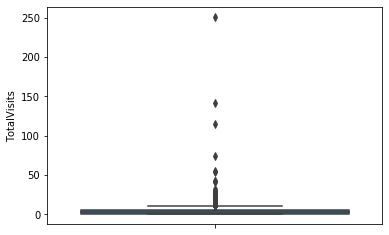

In [62]:
sns.boxplot(y = leads_data['TotalVisits'])

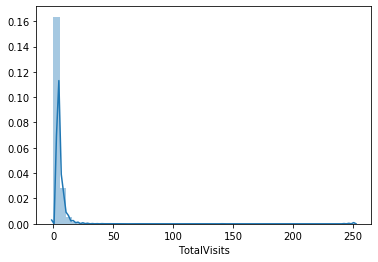

In [63]:
# Next highest nan's column = Country
g = sns.distplot(leads_data['TotalVisits'].dropna())

#g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [64]:
# As we can see outliers in Page Views Per Visit hence imputing with median 
tot_vis_med = leads_data['TotalVisits'].median(skipna = True)
tot_vis_med

3.0

In [65]:
leads_data['TotalVisits'].fillna(tot_vis_med, inplace = True) 

leads_data['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1443
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [66]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

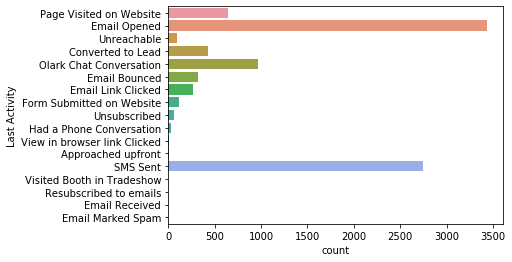

In [67]:
sns.countplot(y = leads_data['Last Activity'])


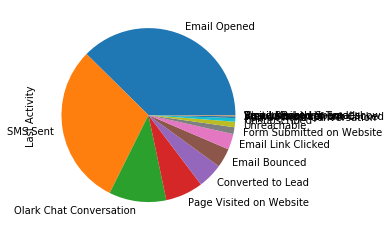

In [68]:
leads_data['Last Activity'].value_counts().plot.pie()

In [69]:
leads_data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [70]:
# Imputing ''Last_Activity' with 'Email Opened'
leads_data['Last Activity'].fillna("Email Opened", inplace = True) 

leads_data['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [71]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

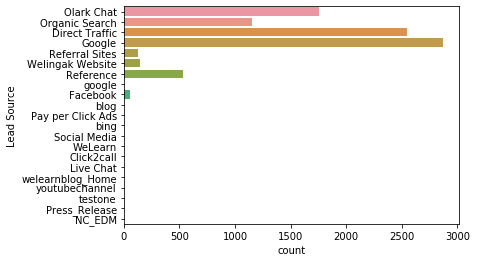

In [72]:
sns.countplot(y = leads_data['Lead Source'])

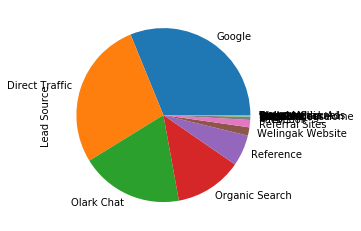

In [73]:
leads_data['Lead Source'].value_counts().plot.pie()

In [74]:
leads_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
welearnblog_Home        1
WeLearn                 1
blog                    1
testone                 1
NC_EDM                  1
youtubechannel          1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [75]:
# Imputing ''Last_Activity' with 'Email Opened'
leads_data['Lead Source'].fillna("Google", inplace = True) 
leads_data['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
welearnblog_Home        1
WeLearn                 1
blog                    1
testone                 1
NC_EDM                  1
youtubechannel          1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [76]:
# google mentioned as "Google" and "google" so changing it to one
leads_data['Lead Source'].replace("google","Google",inplace = True)

In [77]:
leads_data['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
welearnblog_Home        1
WeLearn                 1
blog                    1
testone                 1
NC_EDM                  1
youtubechannel          1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [78]:
#There are 5 columns which has "No" as a value for all rows. since this does not help in our analysis, we will drop these columns
no_columns=['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [79]:
leads_data.drop(columns=no_columns, axis=1, inplace=True)

In [80]:
leads_data['Total Time Spent on Website'] = leads_data['Total Time Spent on Website'].astype(float)

In [81]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9240 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9240 non-null float64
Total Time Spent on Website                      9240 non-null float64
Page Views Per Visit                             9240 non-null float64
Last Activity                                    9240 non-null object
Country                                          9240 non-null object
Specialization                                   924

In [82]:
Converted_rate = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
Converted_rate

38.53896103896104

# Scaling the data

In [83]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0.0,0.0,...,No,No,No,No,No,Interested in other courses,Low in Relevance,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674.0,2.5,...,No,No,No,No,No,Ringing,Not Sure,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532.0,2.0,...,No,No,No,No,No,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305.0,1.0,...,No,No,No,No,No,Ringing,Not Sure,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428.0,1.0,...,No,No,No,No,No,Will revert after reading the email,Might be,Mumbai,No,Modified


In [84]:
leads_data.drop(columns=['Prospect ID','Lead Number'], axis=1, inplace=True)

In [85]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9240 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9240 non-null float64
Total Time Spent on Website                      9240 non-null float64
Page Views Per Visit                             9240 non-null float64
Last Activity                                    9240 non-null object
Country                                          9240 non-null object
Specialization                                   9240 non-null object
What is your current occupation                  9240 non-null object
What matters most to you in choosing a course    92

In [86]:
coltypeobj=['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Tags','Lead Quality','City','A free copy of Mastering The Interview','Last Notable Activity']

In [87]:
# Generating Dummy variables for all catergorical columns
status = pd.get_dummies(leads_data.loc[:,coltypeobj], prefix=coltypeobj, drop_first = True)
new_df_1 = pd.concat([leads_data, status], axis = 1)
new_df_1.drop(columns=coltypeobj, inplace=True)

In [88]:
new_df_1.head(2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674.0,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
new_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 164 entries, Converted to Last Notable Activity_View in browser link Clicked
dtypes: float64(3), int64(1), uint8(160)
memory usage: 1.7 MB


In [90]:
numeric_col = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = new_df_1.select_dtypes(include=numeric_col)
numeric_col=list(new_df_1.columns)

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
Converted_rate = (sum(new_df_1['Converted'])/len(new_df_1['Converted'].index))*100
Converted_rate

38.53896103896104

In [93]:
#Scaling on continuous variables
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler = StandardScaler()
new_df_1[num_vars] = scaler.fit_transform(new_df_1[num_vars])
new_df_1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,-0.713593,-0.889974,-1.098699,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.324018,0.339972,0.066441,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,-0.298549,1.905689,-0.166587,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,-0.506071,-0.333396,-0.632643,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,-0.298549,1.715905,-0.632643,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Split the Data into Test and Train

In [94]:
Converted_rate = (sum(new_df_1['Converted'])/len(new_df_1['Converted'].index))*100
Converted_rate

38.53896103896104

In [95]:
from sklearn.model_selection import train_test_split
np.random.seed(0)

# Putting feature variable to X
X = new_df_1.drop('Converted',axis=1)

# Putting response variable to y
y = new_df_1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [96]:
# Splitting teh data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

# Running Model 1

In [97]:
# Logistic regression model
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                          153
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 Nov 2019   Deviance:                          nan
Time:                        23:05:36   Pearson chi2:                 2.92e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    2.508e+15   6.98e+07   3.59e+07      0.000    2.51e+15    2.51e+15
TotalVisits                                                              2.158e+13   9.12e+05   2.37e+07      0.000    2.16e+13    2.16e+13
Total Time Spent on Website                                              2.234e+14   1.01e+06   2.21e+08      0.000    2.23e+14    2.23e+14
Page Views Per Visit                                                    -2.697e+12    1.2e+06  -2.25e+06      0.000    -2.7e+12    -2.7e+12
Lead Origin_Landing Page Submission                                     -1.877e+14   3.44e+06  -5.46e+07      0.000   -1.88e+14   -1.88e+14
Lead Origin_Lead Add Form                                                5.742e+14    1.3e+07    4.4e+07      0.000    5.74e+14    5.74e+14
Lead Origin_Lead Import                                                  1.301e+15   4.97e+07   2.62e+07      0.000     1.3e+15     1.3e+15
Lead Origin_Quick Add Form                                               4.843e+15    6.8e+07   7.12e+07      0.000    4.84e+15    4.84e+15
Lead Source_Direct Traffic                                              -3.179e+14   4.27e+07  -7.44e+06      0.000   -3.18e+14   -3.18e+14
Lead Source_Facebook                                                    -2.229e+15   6.55e+07  -3.41e+07      0.000   -2.23e+15   -2.23e+15
Lead Source_Google                                                      -4.203e+14   4.26e+07  -9.86e+06      0.000    -4.2e+14    -4.2e+14
Lead Source_Live Chat                                                    2.462e+15   6.26e+07   3.93e+07      0.000    2.46e+15    2.46e+15
Lead Source_NC_EDM                                                        6.25e+15   7.96e+07   7.85e+07      0.000    6.25e+15    6.25e+15
Lead Source_Olark Chat                                                   -5.83e+14   4.28e+07  -1.36e+07      0.000   -5.83e+14   -5.83e+14
Lead Source_Organic Search                                              -3.581e+14   4.27e+07  -8.38e+06      0.000   -3.58e+14   -3.58e+14
Lead Source_Pay per Click Ads                                            7.699e+14   7.97e+07   9.66e+06      0.000     7.7e+14     7.7e+14
Lead Source_Press_Release                                               -3.106e+15   6.43e+07  -4.83e+07      0.000   -3.11e+15   -3.11e+15
Lead Source_Reference                                                   -1.131e+15   4.08e+07  -2.77e+07      0.000   -1.13e+15   -1.13e+15
Lead Source_Referral Sites                                              -3.899e+14   4.33e+07  -9.01e+06      0.000    -3.9e+14    -3.9e+14
Lea

# Feature Selection Using RFE

In [98]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [99]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [100]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False,

In [101]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 79),
 ('Total Time Spent on Website', False, 9),
 ('Page Views Per Visit', False, 113),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', False, 7),
 ('Lead Origin_Lead Import', False, 99),
 ('Lead Origin_Quick Add Form', False, 49),
 ('Lead Source_Direct Traffic', False, 33),
 ('Lead Source_Facebook', False, 30),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Live Chat', False, 134),
 ('Lead Source_NC_EDM', False, 40),
 ('Lead Source_Olark Chat', False, 54),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Pay per Click Ads', False, 138),
 ('Lead Source_Press_Release', False, 102),
 ('Lead Source_Reference', False, 17),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Social Media', False, 85),
 ('Lead Source_WeLearn', False, 131),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 62),
 ('Lead Source_blog', False, 59),
 ('Lead Source_testone', False, 143),
 ('Lead Source_welearnblog

In [102]:
col = X_train.columns[rfe.support_]

In [103]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google',
       ...
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=148)

In [104]:
#Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1468.8
Date:                Mon, 18 Nov 2019   Deviance:                       2937.6
Time:                        23:05:46   Pearson chi2:                 1.74e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4251      0.071    -20.022      0.000      -1.565      -1.286
Lead Source_Welingak Website                      4.8657      0.754      6.449      0.000       3.387       6.344
Last Activity_SMS Sent                            2.2071      0.106     20.896      0.000       2.000       2.414
Country_Saudi Arabia                             -2.0925      1.211     -1.728      0.084      -4.465       0.280
Tags_Closed by Horizzon                           8.2328      1.008      8.164      0.000       6.256      10.209
Tags_Lateral student                             25.2451    7.3e+04      0.000      1.000   -1.43e+05    1.43e+05
Tags_Lost to EINS                                 7.2474      0.790      9.177      0.000       5.700       8.795
Tags_Ringing                                     -3.2934      0.221    -14.909      0.000      -3.726      -2.860
Tags_Will revert after reading the email          4.9691      0.175     28.368      0.000       4.626       5.312
Tags_invalid number                              -3.5475      1.029     -3.447      0.001      -5.564      -1.531
Tags_number not provided                        -23.7641   2.44e+04     -0.001      0.999   -4.78e+04    4.77e+04
Tags_switched off                                -3.7323      0.518     -7.205      0.000      -4.748      -2.717
Tags_wrong number given                         -23.9254   2.06e+04     -0.001      0.999   -4.04e+04    4.04e+04
Lead Quality_Worst                               -2.8935      0.550     -5.262      0.000      -3.971      -1.816
Last Notable Activity_Modified                   -1.8640      0.115    -16.163      0.000      -2.090      -1.638
Last Notable Activity_Olark Chat Conversation    -1.1764      0.395     -2.975      0.003      -1.951      -0.401
=================================================================================================================
"""

In [105]:
X_train= X_train.drop('Tags_Lateral student',axis=1)

In [106]:
col=list(col)
col

['Lead Source_Welingak Website',
 'Last Activity_SMS Sent',
 'Country_Saudi Arabia',
 'Tags_Closed by Horizzon',
 'Tags_Lateral student',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_invalid number',
 'Tags_number not provided',
 'Tags_switched off',
 'Tags_wrong number given',
 'Lead Quality_Worst',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation']

In [107]:
col.remove('Tags_Lateral student')

In [108]:
col

['Lead Source_Welingak Website',
 'Last Activity_SMS Sent',
 'Country_Saudi Arabia',
 'Tags_Closed by Horizzon',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_invalid number',
 'Tags_number not provided',
 'Tags_switched off',
 'Tags_wrong number given',
 'Lead Quality_Worst',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation']

In [109]:
#Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1471.9
Date:                Mon, 18 Nov 2019   Deviance:                       2943.8
Time:                        23:05:46   Pearson chi2:                 1.74e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4272      0.071    -20.049      0.000      -1.567      -1.288
Lead Source_Welingak Website                      4.8584      0.754      6.442      0.000       3.380       6.337
Last Activity_SMS Sent                            2.2179      0.106     21.022      0.000       2.011       2.425
Country_Saudi Arabia                             -2.0907      1.209     -1.730      0.084      -4.460       0.279
Tags_Closed by Horizzon                           8.2237      1.008      8.155      0.000       6.247      10.200
Tags_Lost to EINS                                 7.2393      0.790      9.167      0.000       5.692       8.787
Tags_Ringing                                     -3.3007      0.221    -14.940      0.000      -3.734      -2.868
Tags_Will revert after reading the email          4.9632      0.175     28.366      0.000       4.620       5.306
Tags_invalid number                              -3.5549      1.029     -3.454      0.001      -5.572      -1.538
Tags_number not provided                        -23.7707   2.44e+04     -0.001      0.999   -4.78e+04    4.77e+04
Tags_switched off                                -3.7401      0.518     -7.220      0.000      -4.755      -2.725
Tags_wrong number given                         -23.9328   2.06e+04     -0.001      0.999   -4.04e+04    4.04e+04
Lead Quality_Worst                               -2.8955      0.550     -5.266      0.000      -3.973      -1.818
Last Notable Activity_Modified                   -1.8517      0.115    -16.126      0.000      -2.077      -1.627
Last Notable Activity_Olark Chat Conversation    -1.1738      0.395     -2.969      0.003      -1.949      -0.399
=================================================================================================================
"""

In [110]:
col.remove('Tags_number not provided')
X_train= X_train.drop('Tags_number not provided',axis=1)
#Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1479.5
Date:                Mon, 18 Nov 2019   Deviance:                       2959.0
Time:                        23:05:46   Pearson chi2:                 1.71e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4380      0.071    -20.209      0.000      -1.577      -1.299
Lead Source_Welingak Website                      4.8621      0.754      6.451      0.000       3.385       6.339
Last Activity_SMS Sent                            2.1993      0.105     20.966      0.000       1.994       2.405
Country_Saudi Arabia                             -2.0834      1.206     -1.727      0.084      -4.448       0.281
Tags_Closed by Horizzon                           8.2212      1.008      8.153      0.000       6.245      10.197
Tags_Lost to EINS                                 7.2483      0.791      9.161      0.000       5.698       8.799
Tags_Ringing                                     -3.2746      0.221    -14.845      0.000      -3.707      -2.842
Tags_Will revert after reading the email          4.9666      0.175     28.430      0.000       4.624       5.309
Tags_invalid number                              -3.5282      1.029     -3.429      0.001      -5.545      -1.512
Tags_switched off                                -3.7130      0.518     -7.170      0.000      -4.728      -2.698
Tags_wrong number given                         -22.9079   1.25e+04     -0.002      0.999   -2.45e+04    2.45e+04
Lead Quality_Worst                               -2.9210      0.549     -5.318      0.000      -3.997      -1.845
Last Notable Activity_Modified                   -1.8359      0.115    -16.029      0.000      -2.060      -1.611
Last Notable Activity_Olark Chat Conversation    -1.1632      0.395     -2.942      0.003      -1.938      -0.388
=================================================================================================================
"""

In [111]:
col.remove('Tags_wrong number given')
X_train= X_train.drop('Tags_wrong number given',axis=1)
#Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1491.9
Date:                Mon, 18 Nov 2019   Deviance:                       2983.8
Time:                        23:05:46   Pearson chi2:                 1.66e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4523      0.071    -20.428      0.000      -1.592      -1.313
Lead Source_Welingak Website                      4.8703      0.753      6.469      0.000       3.395       6.346
Last Activity_SMS Sent                            2.1655      0.104     20.832      0.000       1.962       2.369
Country_Saudi Arabia                             -2.1043      1.188     -1.771      0.077      -4.433       0.225
Tags_Closed by Horizzon                           8.2208      1.008      8.154      0.000       6.245      10.197
Tags_Lost to EINS                                 7.2607      0.793      9.159      0.000       5.707       8.814
Tags_Ringing                                     -3.2324      0.220    -14.690      0.000      -3.664      -2.801
Tags_Will revert after reading the email          4.9739      0.174     28.528      0.000       4.632       5.316
Tags_invalid number                              -3.4852      1.029     -3.388      0.001      -5.501      -1.469
Tags_switched off                                -3.6688      0.518     -7.089      0.000      -4.683      -2.654
Lead Quality_Worst                               -2.9488      0.548     -5.379      0.000      -4.023      -1.874
Last Notable Activity_Modified                   -1.8179      0.114    -15.927      0.000      -2.042      -1.594
Last Notable Activity_Olark Chat Conversation    -1.1493      0.396     -2.906      0.004      -1.925      -0.374
=================================================================================================================
"""

In [112]:
col.remove('Country_Saudi Arabia')
X_train= X_train.drop('Country_Saudi Arabia',axis=1)
#Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1493.8
Date:                Mon, 18 Nov 2019   Deviance:                       2987.6
Time:                        23:05:46   Pearson chi2:                 1.65e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4592      0.071    -20.542      0.000      -1.598      -1.320
Lead Source_Welingak Website                      4.8724      0.753      6.474      0.000       3.397       6.348
Last Activity_SMS Sent                            2.1669      0.104     20.863      0.000       1.963       2.370
Tags_Closed by Horizzon                           8.2211      1.008      8.154      0.000       6.245      10.197
Tags_Lost to EINS                                 7.2595      0.792      9.161      0.000       5.706       8.813
Tags_Ringing                                     -3.2303      0.220    -14.684      0.000      -3.661      -2.799
Tags_Will revert after reading the email          4.9675      0.174     28.544      0.000       4.626       5.309
Tags_invalid number                              -3.4864      1.028     -3.391      0.001      -5.502      -1.471
Tags_switched off                                -3.6746      0.517     -7.101      0.000      -4.689      -2.660
Lead Quality_Worst                               -2.9445      0.548     -5.370      0.000      -4.019      -1.870
Last Notable Activity_Modified                   -1.8106      0.114    -15.883      0.000      -2.034      -1.587
Last Notable Activity_Olark Chat Conversation    -1.1420      0.395     -2.888      0.004      -1.917      -0.367
=================================================================================================================
"""

In [113]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Tags_Closed by Horizzon,1.05
0,Lead Source_Welingak Website,1.03
7,Tags_switched off,1.03
3,Tags_Lost to EINS,1.02
6,Tags_invalid number,1.01
10,Last Notable Activity_Olark Chat Conversation,1.00
8,Lead Quality_Worst,0.41
5,Tags_Will revert after reading the email,0.14
1,Last Activity_SMS Sent,0.11
4,Tags_Ringing,0.10


In [115]:
X_test=X_test.drop(columns=['Tags_Lateral student','Tags_Lateral student','Tags_number not provided','Tags_wrong number given','Country_Saudi Arabia',],axis=1)

In [116]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [117]:
y_train_pred[:10]

array([0.00910763, 0.18858965, 0.00910763, 0.0742881 , 0.03662047,
       0.99658169, 0.00910763, 0.99297488, 0.03662047, 0.99658169])

### Creating a dataframe with the actual lead flag and the predicted probabilities

In [118]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.009108,1871
1,0,0.188590,6795
2,0,0.009108,3516
3,0,0.074288,8105
4,0,0.036620,3934


### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [119]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.009108,1871,0
1,0,0.188590,6795,0
2,0,0.009108,3516,0
3,0,0.074288,8105,0
4,0,0.036620,3934,0


In [120]:
from sklearn import metrics

In [121]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3830  172]
 [ 330 2136]]


In [122]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.922387136672851


In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Tags_Closed by Horizzon,1.05
0,Lead Source_Welingak Website,1.03
7,Tags_switched off,1.03
3,Tags_Lost to EINS,1.02
6,Tags_invalid number,1.01
10,Last Notable Activity_Olark Chat Conversation,1.00
8,Lead Quality_Worst,0.41
5,Tags_Will revert after reading the email,0.14
1,Last Activity_SMS Sent,0.11
4,Tags_Ringing,0.10


In [124]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [125]:
y_train_pred[:10]

array([0.00910763, 0.18858965, 0.00910763, 0.0742881 , 0.03662047,
       0.99658169, 0.00910763, 0.99297488, 0.03662047, 0.99658169])

In [126]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [127]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.009108,1871,0
1,0,0.188590,6795,0
2,0,0.009108,3516,0
3,0,0.074288,8105,0
4,0,0.036620,3934,0


In [128]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.922387136672851


### Metrics beyond simply accuracy

In [129]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [130]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8661800486618005

In [131]:
# Let us calculate specificity
TN / float(TN+FP)

0.9570214892553723

In [132]:
# Calculate false postive rate - predicting lead when customer is not a lead
print(FP/ float(TN+FP))

0.04297851074462768


In [133]:
# positive predictive value 
print (TP / float(TP+FP))

0.925476603119584


In [134]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9206730769230769


# Plotting the ROC Curve

In [135]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [136]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

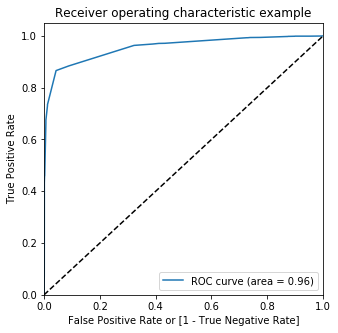

In [137]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Finding Optimal Cutoff Point

In [138]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.009108,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.188590,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.009108,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.074288,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.036620,3934,0,1,0,0,0,0,0,0,0,0,0


In [139]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.786487  0.963504  0.677411
0.2   0.2  0.900124  0.884834  0.909545
0.3   0.3  0.922387  0.866180  0.957021
0.4   0.4  0.922387  0.866180  0.957021
0.5   0.5  0.922387  0.866180  0.957021
0.6   0.6  0.922387  0.866180  0.957021
0.7   0.7  0.891311  0.734793  0.987756
0.8   0.8  0.890847  0.733577  0.987756
0.9   0.9  0.871985  0.674777  0.993503


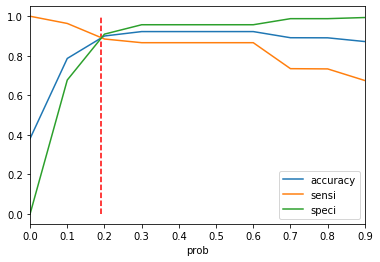

In [140]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.19, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

In [141]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.19 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.009108,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.188590,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.009108,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.074288,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.036620,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [142]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9001236858379715

In [143]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3640,  362],
       [ 284, 2182]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8848337388483374

In [146]:
# Let us calculate specificity
TN / float(TN+FP)

0.9095452273863068

In [147]:
# Calculate false postive rate - predicting lead when customer is not a lead
print(FP/ float(TN+FP))

0.09045477261369315


In [148]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8577044025157232


In [149]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9276248725790011


# Precision and Recall

In [150]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.925476603119584

In [151]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8661800486618005

In [152]:
from sklearn.metrics import precision_score, recall_score

In [153]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.925476603119584

In [154]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8661800486618005

# Precision and recall tradeoff

In [155]:
from sklearn.metrics import precision_recall_curve

In [156]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
        ..
 6438    1
 6439    0
 6440    1
 6441    1
 6442    0
 6443    0
 6444    0
 6445    0
 6446    0
 6447    0
 6448    0
 6449    0
 6450    1
 6451    1
 6452    1
 6453    1
 6454    1
 6455    1
 6456    1
 6457    1
 6458    0
 6459    1
 6460    1
 6461    0
 6462    1
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      1
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      0
 21      1
 22      1
 23      1
 24      1
 25      

In [157]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

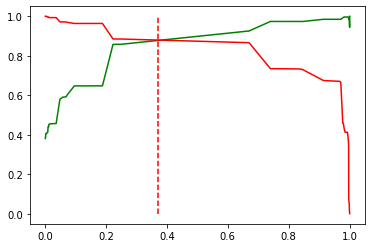

In [158]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.37, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

# Making predictions on the test set

In [159]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4269,0,1,0,0,0,0,0,0,0,0,0
2376,0,1,0,0,0,1,0,0,0,0,0
7766,0,0,0,0,0,1,0,0,0,0,0
9199,0,0,0,0,0,0,0,0,0,1,0
4359,0,0,0,0,0,1,0,0,0,0,0


In [160]:
X_test_sm = sm.add_constant(X_test)

In [161]:
y_test_pred = res.predict(X_test_sm)

In [162]:
y_test_pred[:10]

4269    0.669888
2376    0.996582
7766    0.970923
9199    0.036620
4359    0.970923
9186    0.996582
1631    0.970923
8963    0.970923
8007    0.036620
5324    0.996582
dtype: float64

In [163]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [164]:
# Let's see the head
y_pred_1.head()

,0
4269,0.669888
2376,0.996582
7766,0.970923
9199,0.036620
4359,0.970923


In [165]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [166]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [167]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [168]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [169]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.669888
1,1,2376,0.996582
2,1,7766,0.970923
3,0,9199,0.036620
4,1,4359,0.970923


In [170]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [171]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,4269,0.669888
1,1,2376,0.996582
2,1,7766,0.970923
3,0,9199,0.036620
4,1,4359,0.970923


In [172]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Converted','Lead Number','Converted_Prob'], axis=1)

In [173]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,4269,0.669888
1,1,2376,0.996582
2,1,7766,0.970923
3,0,9199,0.036620
4,1,4359,0.970923


In [174]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [175]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,1,4269,0.669888,1
1,1,2376,0.996582,1
2,1,7766,0.970923,1
3,0,9199,0.036620,0
4,1,4359,0.970923,1


In [176]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9231601731601732

In [177]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1595,   82],
       [ 131,  964]], dtype=int64)

In [178]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [179]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8803652968036529

In [180]:
# Let us calculate specificity
TN / float(TN+FP)

0.951103160405486

In [181]:
TP/float(TP+FP)

0.9216061185468452

### Ranking leads in a way that HOT leads gets a higher rank

In [182]:
y_pred_final.sort_values("Converted_Prob", axis = 0, ascending = True,inplace = True, na_position ='last')

In [183]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted
2394,0,201,0.000051,0
1344,0,8368,0.000374,0
2196,0,5627,0.000483,0
364,0,5667,0.000963,0
1718,0,2425,0.000963,0


In [184]:
Converted_Prob_values=y_pred_final['Converted_Prob'].values

In [185]:
Converted_Prob_values=list(Converted_Prob_values)

In [186]:
rank_list=[]
rank=1
previous_value=100
for each in Converted_Prob_values:
    if each<=previous_value:
        rank_list.append(rank)
        previous_value=each
    else:
        rank=rank+1
        rank_list.append(rank)
        previous_value=each

In [187]:
y_pred_final=y_pred_final.assign(Rank=rank_list)

In [188]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted,Rank
2394,0,201,0.000051,0,1
1344,0,8368,0.000374,0,2
2196,0,5627,0.000483,0,3
364,0,5667,0.000963,0,4
1718,0,2425,0.000963,0,4


In [189]:
y_pred_final.tail()

,Converted,Lead Number,Converted_Prob,final_predicted,Rank
94,1,8103,0.999991,1,53
915,1,8412,0.999994,1,54
1329,1,4812,0.999994,1,54
920,1,3339,0.999994,1,54
2162,1,3736,0.999994,1,54
